In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'

In [38]:
#将minimal.cfg中的替死鬼文件中的数据换成实验输入的，dir:grating所在地址 
def replace(dir):
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_32.bin', 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [3]:
#运行minimalTC
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')

In [4]:
#读取fr
def read_spike(file):
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return LGN_spike_time,fr


In [5]:
#实验测试 file:输入图片
def experiment(file):
    replace(file)
    minimalTC()

In [53]:

file='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96_phase=pi/static_color-grid_5.bin'
experiment(file)

repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([210., 324., 251., 201., 202., 221., 237., 246., 229., 221., 199.,
        207., 193., 143., 133., 131.,  98.,  85.,  68.,  57.,  44.,  32.,
         30.,  20.,  18.,  14.,   6.,   4.,   6.,   5.,   3.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

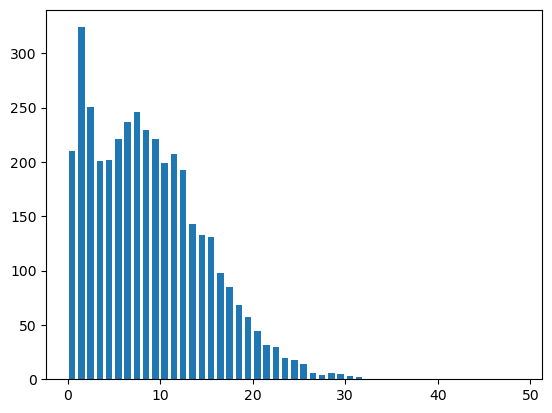

In [54]:
LGN_spike_time,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

In [55]:
lgn=np.array(LGN_spike_time)
print(lgn.shape)
print(len(lgn[0]))
ar,num=np.unique(lgn,return_counts=True)
# #print(LGN_spike_time[0])
print(ar[1:])
print([num[0],np.sum(num[1:])])

(512, 8000)
8000
[1 2 3 4]
[3976021, 119979]


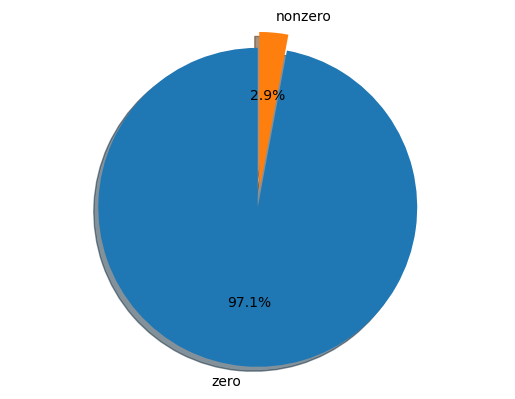

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = '0', '1', '2', '3','4'
explode = (0, 0.1)  # only "explode" the 1st slice (i.e. '0')
numbers=[num[0],np.sum(num[1:])]
labels=['zero','nonzero']
fig1, ax1 = plt.subplots()
ax1.pie(numbers, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('lgn_spike.jpg')
plt.show()